# Prevalencia de desórdenes de salud mental a nivel mundial

Después de tu experiencia exitosa en el gobierno Uruguayo recibiste una oferta para trabajar en la OMS en un área encargada de analizar métricas de salud mental. Ahora tienes el reto de encontrar qué variables demográficas están relacionadas a una mayor prevalencia de desórdenes de salud mental en los distintos países. 

Primero carguemos los datos que se te han brindado para esta tarea:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

df_age = pd.read_csv("depression-data-age.csv")
df_subsdis = pd.read_csv("depression-data-subsdis.csv")

## Depresión según edad

En el DataFrame `df_age` encontrarás datos de prevalencia de depresión según grupo etario en los diferentes países. Dale un primer vistazo a la tabla:

In [2]:
df_age.head()

,entity,code,year,20_24_years_old,10_14_years_old,all_ages,70_years_old,30_34_years_old,15_19_years_old,25_29_years_old,50_69_years_old,age_standardized,15_49_years_old
0,Afghanistan,AFG,2017,4.386172,1.618270,3.050785,5.279772,5.749905,3.433750,5.105028,6.131183,4.136347,5.010372
1,Albania,ALB,2017,2.437424,0.900396,2.607896,4.399558,2.401418,2.004014,2.398396,3.664052,2.208414,2.487747
2,Algeria,DZA,2017,3.854475,1.757578,3.691020,4.848270,4.630534,3.404122,4.256386,5.402483,3.661094,4.522808
3,American Samoa,ASM,2017,2.885708,1.063623,2.787788,5.746022,2.971754,2.438167,2.862544,5.451378,2.939668,3.115501
4,Andean Latin America,NaN,2017,2.884113,1.024932,2.538325,4.663443,2.966047,2.354958,2.933790,4.408046,2.610385,2.969004


### Estadística sumaria

- Elabora un reporte que incluya medidas de tendencia central y dispersión de los datos de prevalencia de depresión en cada uno de los grupos etarios presentes en la tabla.

In [3]:
df_age.describe()

,year,20_24_years_old,10_14_years_old,all_ages,70_years_old,30_34_years_old,15_19_years_old,25_29_years_old,50_69_years_old,age_standardized,15_49_years_old
count,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,2017.0,3.706926,1.397120,3.439598,6.046412,3.994721,3.056514,3.829041,5.577609,3.456795,3.987390
std,0.0,1.052299,0.417481,0.802362,1.487770,0.996078,0.865632,0.993749,0.975802,0.631240,0.940574
min,2017.0,1.780428,0.747197,2.044991,3.324191,2.268459,1.558497,1.986453,3.297842,2.196154,2.330373
25%,2017.0,3.042508,1.072127,2.787209,4.805046,3.240232,2.482908,3.142142,4.796985,2.977820,3.302787
50%,2017.0,3.423213,1.273278,3.283090,5.800674,3.867810,2.839126,3.663979,5.504972,3.463055,3.842542
75%,2017.0,4.185398,1.615594,3.917571,7.358498,4.579750,3.415515,4.379901,6.306789,3.858115,4.564212
max,2017.0,10.381345,3.164350,6.577909,11.299540,8.790512,8.550650,9.441284,9.300100,6.233635,8.961353


- ¿Cuál o cuáles son los grupos etarios con mayor prevalencia de depresión? ¿Y con menor prevalencia? Elabora un gráfico para ilustrar tus resultados (sugerencia: usa la función boxplot del paquete seaborn).   

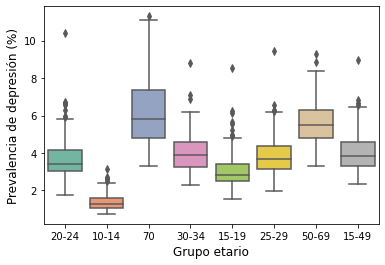

In [4]:
ax = sns.boxplot(data=df_age.iloc[:, np.r_[3, 4, 6:11, 12]], palette="Set2")
grupos_etarios = df_age.columns[np.r_[3, 4, 6:11, 12]].tolist()
for i in range(len(grupos_etarios)):
    grupos_etarios[i] = grupos_etarios[i].replace("_years_old", "")
    grupos_etarios[i] = grupos_etarios[i].replace("_", "-")
ax.set_xticklabels(grupos_etarios)
ax.set_ylabel("Prevalencia de depresión (%)", size=12)
ax.set_xlabel("Grupo etario", size=12);

## Prevalencia de desórdenes de salud mental a nivel mundial

En el DataFrame `df_subsdis` encontrarás datos de prevalencia de de desórdenes de salud mental de los diferentes países. Dale un primer vistazo a la tabla:

In [5]:
df_subsdis.head()

,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
2,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
4,Andean Latin America,NaN,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573


### Estadística sumaria

- Elabora un reporte que incluya medidas de tendencia central y dispersión de los datos de prevalencia de cada una de las condiciones de salud mental presentes en la tabla (esquizofrenia, desorden bipolar, desórdenes alimenticios, desórdenes de ansiedad, desorden de consumo de drogas).  

In [6]:
df_subsdis.describe()

,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
count,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,2017.0,0.214705,0.722693,0.262806,4.002347,0.903575,3.456795,1.590201
std,0.0,0.043744,0.171151,0.166802,1.156436,0.515651,0.631240,0.830195
min,2017.0,0.149087,0.321906,0.079896,2.066871,0.433416,2.196154,0.462937
25%,2017.0,0.185901,0.620460,0.137388,3.201061,0.556454,2.977820,1.009115
50%,2017.0,0.203248,0.696349,0.204891,3.583301,0.740219,3.463055,1.480769
75%,2017.0,0.243424,0.841262,0.316813,4.678479,0.944499,3.858115,1.855998
max,2017.0,0.363326,1.206088,0.943081,8.539931,3.452476,6.233635,5.342888


- ¿Cuál o cuáles son los desórdenes con mayor prevalencia? ¿Y con menor prevalencia? Elabora un gráfico para ilustrar tus resultados (sugerencia: usa la función boxplot del paquete seaborn).   

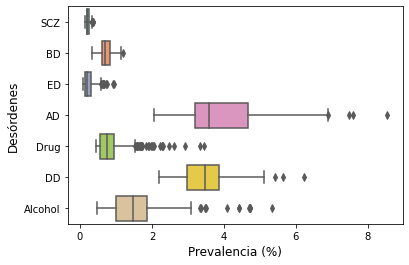

In [7]:
disorders = df_subsdis.iloc[:, 3:]
ax = sns.boxplot(data=disorders, orient="h", palette="Set2")
ax.set_xlabel("Prevalencia (%)", size=12)
ax.set_ylabel("Desórdenes", size=12)
desordenes = ["SCZ", "BD", "ED", "AD", "Drug", "DD", "Alcohol"]
ax.set_yticklabels(desordenes);

### Análisis de correlación

- Ahora, explora si existen correlaciones entre las prevalencias de algunas de las condiciones de salud mental listadas. Primero calcula coeficientes de correlación y luego crea una visualización que facilite su interpretación.

In [8]:
disorders.corr()

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
schizophrenia,1.000000,0.173674,0.666105,0.439769,0.451325,0.137445,-0.038541
bipolar_disorder,0.173674,1.000000,0.708689,0.664272,0.333623,0.119275,0.097854
eating_disorders,0.666105,0.708689,1.000000,0.696959,0.443773,0.238986,0.051914
anxiety_disorders,0.439769,0.664272,0.696959,1.000000,0.598606,0.390042,-0.130473
drug_use_disorders,0.451325,0.333623,0.443773,0.598606,1.000000,0.390894,-0.110121
depression,0.137445,0.119275,0.238986,0.390042,0.390894,1.000000,-0.014848
alcohol_use_disorders,-0.038541,0.097854,0.051914,-0.130473,-0.110121,-0.014848,1.000000


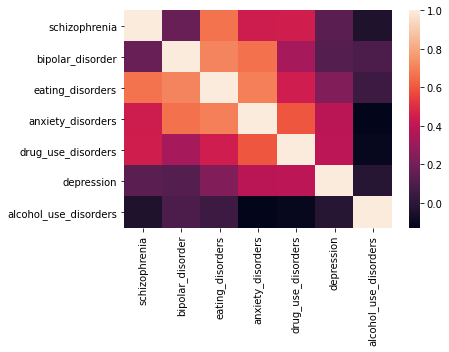

In [9]:
sns.heatmap(disorders.corr());

- Crea una matriz de gráficos de dispersión de las variables.
(Pista: Utiliza la función pairplot del paquete seaborn).  

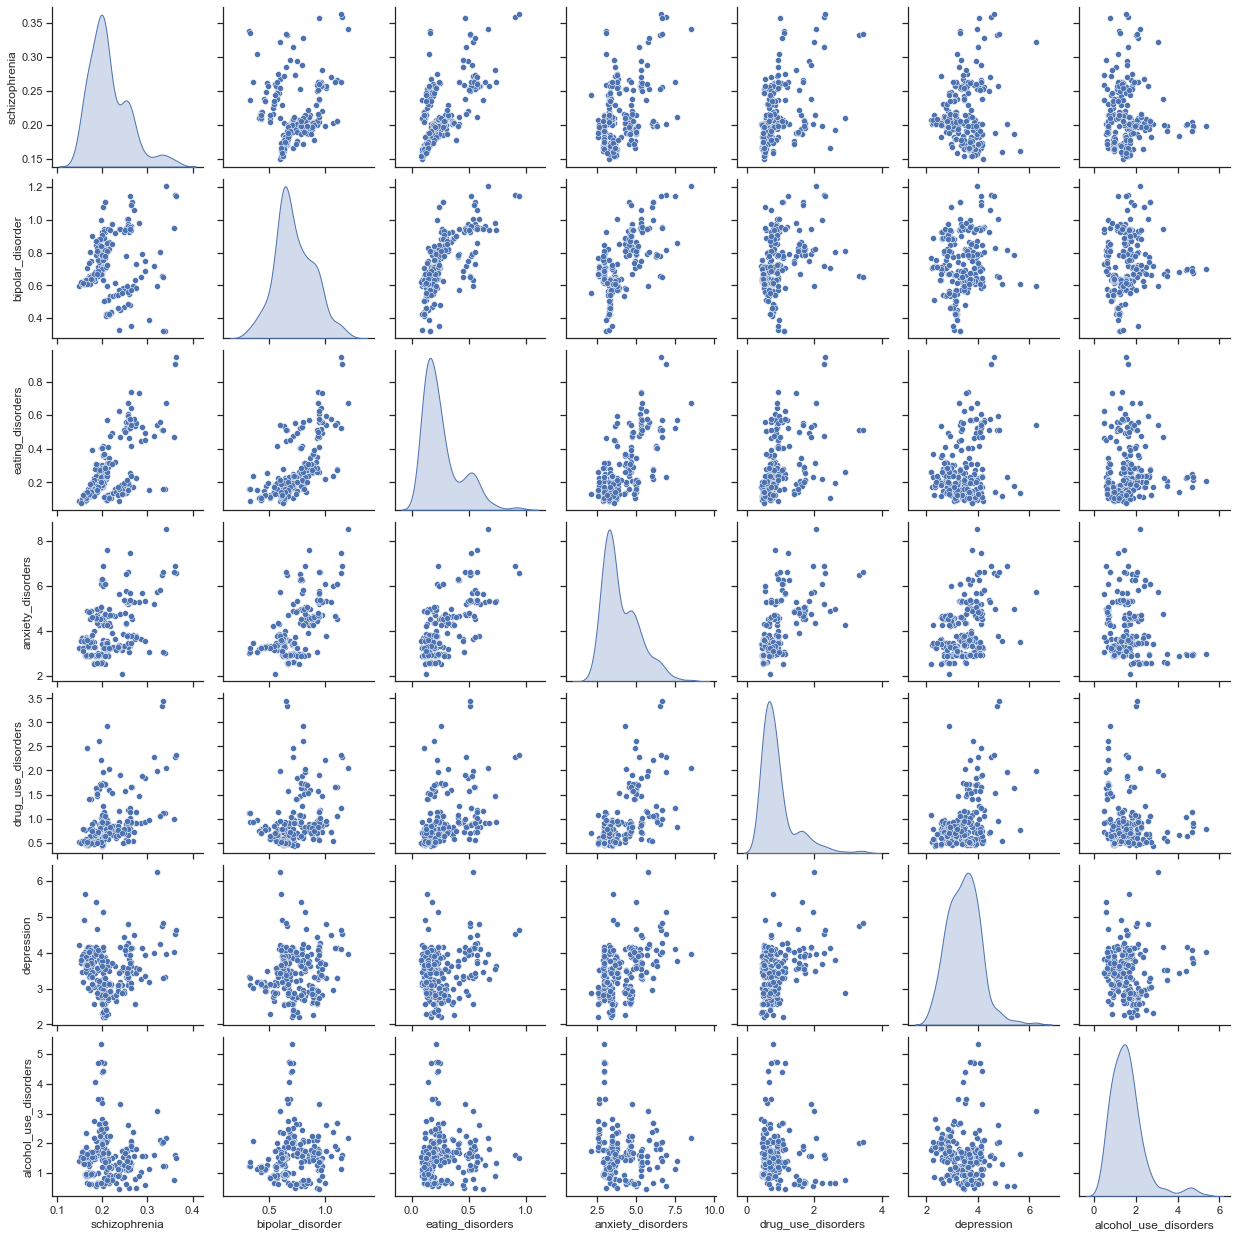

In [10]:
sns.set_theme(style="ticks")
sns.pairplot(disorders, diag_kind="kde");